#problem 1

##get data

In [107]:
import numpy as np
import pandas as pd 
import math
import statistics 
import random 

url = 'https://raw.githubusercontent.com/RanjithKalingeri/housing-price-/main/Housing%20Price%20data%20set.csv'
df = pd.read_csv(url)

y_c = df[['price']]
x_c = df[['lotsize', 'bedrooms', 'bathrms']]

x = x_c.head(382)
x.insert (0, 'x', 1)
y = y_c.head(382)
x_c.insert (0, 'x_c', 1)
x_c

,x_c,lotsize,bedrooms,bathrms
0,1,5850,3,1
1,1,4000,2,1
2,1,3060,3,1
3,1,6650,3,1
4,1,6360,2,1
...,...,...,...,...
541,1,4800,3,2
542,1,6000,3,2
543,1,6000,3,2
544,1,6000,3,2


##get coef with out regulization

In [108]:
import numpy as np


def get_coef(x,y):
    z = np.dot(x.transpose(), x)
    z = np.linalg.inv(z)
    a = np.dot(x.transpose(), y)
    w =np.dot(z, a)
    return w

get_coef(x,y)

array([[-4.89492370e+03],
       [ 5.93101241e+00],
       [ 5.52857201e+03],
       [ 1.90100176e+04]])

##predict estimated price of house 

In [109]:
def predict (w, x, i):
    return w[0][0] + w[1][0] * x.iloc[i,1] + w[2][0]*x.iloc[i,2] + w[3][0]*x.iloc[i,3]

#predict(w, x, 3)


##get coef for l2 regulization 

In [110]:

def get_coef_l2 (x, y, l):
    z = np.dot(x.transpose(), x)
    i = np.identity(4)
    i[0][0] =0
    i = np.dot(i, l)
    z = np.add(z,i)
    z = np.linalg.inv(z)
    a = np.dot(x.transpose(), y)
    w =np.dot(z, a)
    return w

w= get_coef_l2(x,y, 0)

p = predict (w, x, 0)
p

65397.23247626203

##error function 

In [111]:
def cost_function(x, y, l ): 
    w = get_coef_l2(x, y, l)
    cost = 0
    for i in range(382,545):
        y_hat = predict(w, x_c, i)
        cost += (abs(y_hat - y_c.iloc[i,0])/ y_c.iloc[i,0]) * 100
    return cost/(163)
cost_function(x_c,y_c,0)

17.583893583994588

##main

[17.583893583994588, 17.58389247295774, 17.5838824737109, 17.583782489627787, 17.58278348661137, 17.573457749566693, 17.503706342756157, 17.600805363203516]


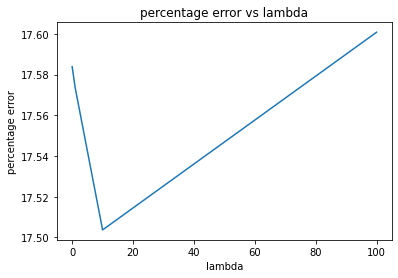

In [112]:
import matplotlib.pyplot as plt
y1 = []
for i in [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]: 
    c = cost_function(x_c,y_c,i)
    y1.append(c)
print(y1)
plt.xlabel('lambda') 
plt.ylabel('percentage error')  
plt.title('percentage error vs lambda') 
plt.plot([0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], y1)




#problem 2

##making feature dataframe

In [115]:
df["bathrms"] = pd.to_numeric(df["bathrms"], downcast="float")
x_plot =    df['lotsize']
x_bedroom = df['bedrooms']
x_bathrooms = df['bathrms']


plot_min = x_plot.min()
plot_max = x_plot.max()

bedroom_min = (x_bedroom.min())
bedroom_max = x_bedroom.max()

bathrooms_min = float (x_bathrooms.min())
bathrooms_max = float (x_bathrooms.max())

#print(bathrooms_max - bathrooms_min)

#print((x_bathrooms[544] - bathrooms_min)/ (bathrooms_max-bathrooms_min))

#print('next')
#print(x_bathrooms[544] )

for i in range(546): 
    x_plot.iloc[i]    =  (x_plot.iloc[i] - plot_min)/ (plot_max - plot_min)
    x_bedroom.iloc[i] =  (x_bedroom.iloc[i] - bedroom_min) / (bedroom_max - bedroom_min)
    x_bathrooms[i]     =   (x_bathrooms[i] - bathrooms_min)/  (bathrooms_max-bathrooms_min)

data = [df["lotsize"], df["bedrooms"], df["bathrms"]]

#print(x_plot)

headers = ["plotsize", "bedrooms", "bathrooms"]
x_featured = pd.concat(data, axis=1, keys=headers)

x_featured.insert (0, 'df_3', 1)

print(x_featured)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     df_3  plotsize  bedrooms  bathrooms
0       1  0.288660       0.4   0.000000
1       1  0.161512       0.2   0.000000
2       1  0.096907       0.4   0.000000
3       1  0.343643       0.4   0.000000
4       1  0.323711       0.2   0.000000
..    ...       ...       ...        ...
541     1  0.216495       0.4   0.333333
542     1  0.298969       0.4   0.333333
543     1  0.298969       0.4   0.333333
544     1  0.298969       0.4   0.333333
545     1  0.298969       0.4   0.000000

[546 rows x 4 columns]


##batch gradient decent function 

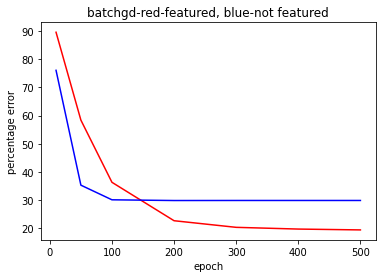

In [116]:
def gradientdecent (x, y, alpha, epoch): 
    w = [[0],[0],[0],[0]]
    for k in range(epoch): 
        delta = [0,0,0,0]
        error =0
        for i in range(381):
            y_hat = predict(w,x,i)
            error = float(y_hat - y.iloc[i,0])
            for j in range(4): 
                delta[j] += error * x.iloc[i,j]
        #print(delta[1]/381)
        for k in range(4): 
            w[k][0] = w[k][0] -  (alpha/(381)) * delta[k] 
        #print(w)
    return w

def cost_batchgd(x, y, alpha, epoch): 
    w = gradientdecent(x, y, alpha, epoch)
    cost = 0
    #print(w)
    for i in range(382,545):
        #print(i)
        y_hat1 = predict(w, x, i)
        #print(y_hat1)
        #print(str(y_hat1) + '  vs  ' + str(y_c.iloc[i,0]))
        cost += (abs(y_hat1 - y_c.iloc[i,0])/ y_c.iloc[i,0]) * 100
    return cost/(163)

#cost_batchgd(x_c, y_c, 0.000000001, 500)


def plot_graph(x_c, y_c, alpha_normal, alpha_featured): 
    y_normal = []
    y_featured = []

    for i in   [10, 50, 100, 200, 300, 400, 500]:       
        y_temp = cost_batchgd(x_c, y_c, alpha_normal, i)
        y_temp1 = cost_batchgd(x_featured, y_c, alpha_featured, i)
        y_featured.append(y_temp1)
        y_normal.append(y_temp)
    plt.xlabel('epoch') 
    plt.ylabel('percentage error')  
    plt.title('batchgd-red-featured, blue-not featured') 
    plt.plot([10, 50, 100, 200, 300, 400, 500] ,y_featured, 'r')   
    plt.plot([10, 50, 100, 200, 300, 400, 500] ,y_normal, 'b')
    plt.show()

plot_graph(x_c, y_c,0.000000001, 0.01 )

    




##stochastic gradient decent function 

[[0.01619978804657713], [12.901700804252373], [0.0649777685752212], [0.03815677712034135]]
[[45217.05107509713], [49723.255393654195], [34127.25927861618], [45456.13283479439]]
[[0.07029572824314198], [12.90157139091369], [0.294795301196258], [0.1775641798271171]]
[[35366.338994496116], [81748.26783976077], [29535.35230292865], [58025.548995346064]]
[[0.1379137541344461], [12.901409628602796], [0.5820588507721897], [0.35182001702025123]]
[[34931.06465177713], [84408.60039344458], [28712.4163598502], [57758.00674043644]]
[[0.27314347497997965], [12.901086118521999], [1.1565580636749277], [0.7003203045223245]]
[[34903.559812991305], [84549.57606121965], [28684.47364582198], [57728.48669453905]]
[[0.40836475500461605], [12.900762627828199], [1.7310200968164513], [1.0488054102435156]]
[[34903.45818128517], [84549.96561552264], [28684.474791816177], [57728.35154469888]]
[[0.5435775947225504], [12.900439156520221], [2.305444952481619], [1.3972753350614557]]
[[34903.457826210986], [84549.9667

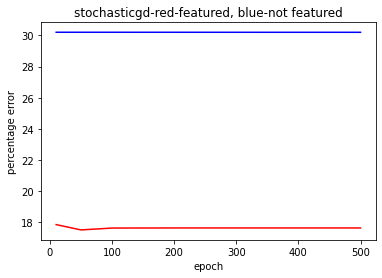

In [117]:
def stochastic_gradient_decent(x, y, alpha, epoch): 
  w = [[0], [0], [0], [0]]
  for k in range(epoch):
      error =0
      for i in range(381):
          y_hat = predict(w,x,i)
          error = float(y_hat - y.iloc[i,0])
          #print(error)
          for j in range(4): 
              #print(y_hat)
              #print(y.iloc[i,0])
              w[j][0] = w[j][0] - alpha * error * x.iloc[i,j]
  return w

def cost_stochastic(x, y, alpha, epoch): 
    w = stochastic_gradient_decent(x, y, alpha, epoch)
    cost = 0
    print(w)
    for i in range(382,545):
        #print(i)
        y_hat1 = predict(w, x, i)
        #print(y_hat1)
        #print(str(y_hat1) + '  vs  ' + str(y_c.iloc[i,0]))
        cost += (abs(y_hat1 - y_c.iloc[i,0])/ y_c.iloc[i,0]) * 100
    return cost/(163)
  
#cost_stochastic(x_c, y_c, 0.000000001, 500)

def plot_graph(x_c, y_c, alpha_normal, alpha_featured): 
    y_normal = []
    y_featured = []

    for i in   [10, 50, 100, 200, 300, 400, 500]:       
        y_temp = cost_stochastic(x_c, y_c, alpha_normal, i)
        y_temp1 = cost_stochastic(x_featured, y_c, alpha_featured, i)
        y_featured.append(y_temp1)
        y_normal.append(y_temp)
    plt.xlabel('epoch') 
    plt.ylabel('percentage error')  
    plt.title('stochasticgd-red-featured, blue-not featured') 
    plt.plot([10, 50, 100, 200, 300, 400, 500],y_featured, 'r')   
    plt.plot([10, 50, 100, 200, 300, 400, 500] ,y_normal, 'b')
    plt.show()

plot_graph(x_c, y_c,0.000000001, 0.01 )

##mini batch gradient decent algorithm 

[[0.0004926551289305793], [2.357777476193064], [0.0014006773952079873], [0.00060075590196109]]
[[5137.652852290641], [1121.0831970490176], [1893.5059772678287], [377.11378958246485]]
[[0.0016906361755846583], [7.909435551924426], [0.004836992474887651], [0.0020715119999899995]]
[[20561.77008846121], [4609.473385833706], [7641.7294655248725], [1573.6037558193914]]
[[0.002318768197172914], [10.483997808026116], [0.006694842346356215], [0.002861005488325348]]
[[31916.268043810283], [7428.914469091863], [12002.924227399912], [2585.5062965916445]]
[[0.002770754772049116], [11.59481500209546], [0.008155438162984835], [0.003469550512843161]]
[[41520.55449845091], [10512.81992245248], [16048.591036040438], [3802.078196670799]]
[[0.003024949013083959], [11.7125095930273], [0.009061446406654131], [0.0038394391172829516]]
[[44213.47423587385], [12238.321324941693], [17616.467397584158], [4581.270498126939]]
[[0.0032581864102808555], [11.72497922932705], [0.009908693977148993], [0.0041840411700477

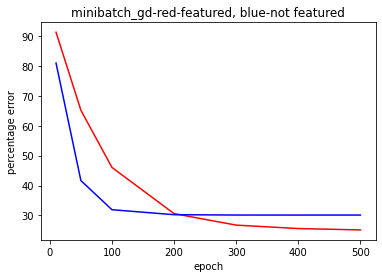

In [118]:
def minibatch_gradientdecent (x, y, alpha, epoch, b): 
    w = [[0],[0],[0],[0]]
    for k in range(epoch): 
        delta = [0,0,0,0]
        error =0
        for i in range(b):
            y_hat = predict(w,x,i)
            error = float(y_hat - y.iloc[i,0])
            for j in range(4): 
                delta[j] += error * x.iloc[i,j]
        #print(delta[1]/381)
        for k in range(4): 
            w[k][0] = w[k][0] -  (alpha/(b)) * delta[k] 
        #print(w)
    return w


def cost_minibatch(x, y, alpha, epoch, b ): 
    w = minibatch_gradientdecent (x, y, alpha, epoch, b)
    cost = 0
    print(w)
    for i in range(382,545):
        #print(i)
        y_hat1 = predict(w, x, i)
        #print(y_hat1)
        #print(str(y_hat1) + '  vs  ' + str(y_c.iloc[i,0]))
        cost += (abs(y_hat1 - y_c.iloc[i,0])/ y_c.iloc[i,0]) * 100
    return cost/(163)

def plot_graph(x_c, y_c, alpha_normal, alpha_featured): 
    y_normal = []
    y_featured = []

    for i in   [10, 50, 100, 200, 300, 400, 500]:       
        y_temp =  cost_minibatch(x_c, y_c, alpha_normal, i, 100)
        y_temp1 = cost_minibatch(x_featured, y_c, alpha_featured, i, 100)
        y_featured.append(y_temp1)
        y_normal.append(y_temp)
    plt.xlabel('epoch') 
    plt.ylabel('percentage error')  
    plt.title('minibatch_gd-red-featured, blue-not featured') 
    plt.plot([10, 50, 100, 200, 300, 400, 500] ,y_featured, 'r')   
    plt.plot([10, 50, 100, 200, 300, 400, 500] ,y_normal, 'b')
    plt.show()

plot_graph(x_c, y_c,0.000000001, 0.01 )

#problem3 

##batch gradient with regulization

[30.153101050116145, 30.153101050202512, 30.153101050979718, 30.153101058752014, 30.153101136474838]


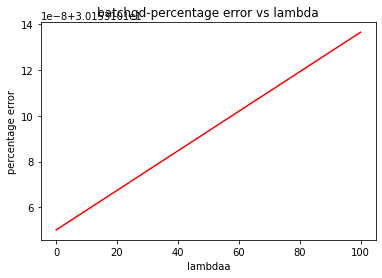

In [119]:
def gradientdecent_regularized (x, y, alpha, epoch, lambdaa): 
    w = [[0],[0],[0],[0]]
    for k in range(epoch): 
        delta = [0,0,0,0]
        error =0
        for i in range(381):
            y_hat = predict(w,x,i)
            error = float(y_hat - y.iloc[i,0])
            for j in range(4): 
                delta[j] += error * x.iloc[i,j]
        for k in range(4): 
            if k!=0: 
                w[k][0] = w[k][0] -  (alpha/(381)) * (delta[k] + lambdaa*w[k][0])
            else: 
                w[k][0] = w[k][0] -  (alpha/(381)) * (delta[k])
    return w

def cost_batchgd_reularized(x, y, alpha, epoch, lambdaa): 
    w = gradientdecent_regularized(x, y, alpha, epoch, lambdaa)
    cost = 0
    #print(w)
    for i in range(382,545):
        #print(i)
        y_hat1 = predict(w, x, i)
        #print(y_hat1)
        #print(str(y_hat1) + '  vs  ' + str(y_c.iloc[i,0]))
        cost += (abs(y_hat1 - y_c.iloc[i,0])/ y_c.iloc[i,0]) * 100
    return cost/(163)


def plot_graph(x_c, y_c, alpha_normal, epoch): 
    y_normal = []
    for i in   [0, 0.1, 1, 10, 100]:       
        y_temp =  cost_batchgd_reularized(x_c, y_c,0.000000001 ,100, i)
        y_normal.append(y_temp)
    print(y_normal)
    plt.xlabel('lambdaa') 
    plt.ylabel('percentage error')  
    plt.title('batchgd-percentage error vs lambda') 
    plt.plot( [0, 0.1, 1, 10, 100] ,y_normal, 'r')   
    plt.show()

plot_graph(x_c, y_c, 0.000000001,100 )          

##stochastic gradient decent with regularization

[[0.1379137541344461], [12.901409628602796], [0.5820588507721896], [0.35182001702025123]]
[[0.13791349626720611], [12.901409610664466], [0.5820577580317561], [0.35181935458978264]]
[[0.1379111754915272], [12.901409449219418], [0.582047923492703], [0.3518133927911675]]
[[0.13788797065299388], [12.901407834762333], [0.5819495904535846], [0.35175378229036297]]
[[0.1376562138147972], [12.901391689528918], [0.5809674940375076], [0.35115842510692324]]
[30.203993775198366, 30.203993757100566, 30.203993594220297, 30.203991965400824, 30.203975675525893]


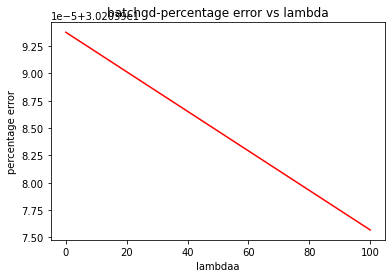

In [120]:
import matplotlib.pyplot as plt

def stochasticgd_regularization(x, y, alpha, epoch, lambdaa): 
  w = [[0], [0], [0], [0]]
  for k in range(epoch):
      error =0
      for i in range(381):
          y_hat = predict(w,x,i)
          error = float(y_hat - y.iloc[i,0])
          #print(error)
          for j in range(4): 
              #print(y_hat)
              #print(y.iloc[i,0])
              if k!=0 :
                  w[j][0] = w[j][0] - alpha * (error * x.iloc[i,j] +lambdaa * w[j][0])
              else: 
                  w[j][0] = w[j][0] - alpha * error * x.iloc[i,j] 

  return w

def cost_stochasticgd_regularization(x, y, alpha, epoch, lambdaa): 
    w = stochasticgd_regularization(x, y, alpha, epoch, lambdaa)
    cost = 0
    print(w)
    for i in range(382,545):
        #print(i)
        y_hat1 = predict(w, x, i)
        #print(y_hat1)
        #print(str(y_hat1) + '  vs  ' + str(y_c.iloc[i,0]))
        cost += (abs(y_hat1 - y_c.iloc[i,0])/ y_c.iloc[i,0]) * 100
    return cost/(163)

def plot_graph(x_c, y_c, alpha_normal, epoch): 
    y_normal = []
    for i in   [0, 0.1, 1, 10, 100]:       
        y_temp =  cost_stochasticgd_regularization(x_c, y_c,0.000000001 ,100, i)
        y_normal.append(y_temp)
    print(y_normal)
    plt.xlabel('lambdaa') 
    plt.ylabel('percentage error')  
    plt.title('batchgd-percentage error vs lambda') 
    plt.plot( [0, 0.1, 1, 10, 100] ,y_normal, 'r')   
    plt.show()

plot_graph(x_c, y_c, 0.000000001,100 )      


##mini batch gradient decent with regularization

[[0.002318768197172914], [10.483997808026116], [0.006694842346356215], [0.002861005488325348]]
[[0.002318768197243637], [10.48399780768087], [0.006694842346121833], [0.0028610054882254746]]
[[0.002318768197880138], [10.48399780457372], [0.006694842344012356], [0.002861005487326612]]
[[0.002318768204245165], [10.48399777350217], [0.006694842322917667], [0.0028610054783379845]]
[[0.0023187682678954213], [10.48399746278669], [0.006694842111970778], [0.0028610053884517038]]
[31.892907662751604, 31.89290766345898, 31.892907669825433, 31.8929077334899, 31.892908370134418]


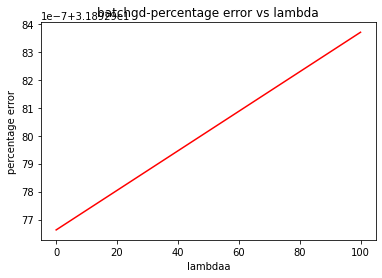

In [121]:
def minibatchgd_regularization (x, y, alpha, epoch, b, lambdaa): 
    w = [[0],[0],[0],[0]]
    for k in range(epoch): 
        delta = [0,0,0,0]
        error =0
        for i in range(b):
            y_hat = predict(w,x,i)
            error = float(y_hat - y.iloc[i,0])
            for j in range(4): 
                delta[j] += error * x.iloc[i,j]
        #print(delta[1]/381)
        for k in range(4): 
            if k!=0: 
                w[k][0] = w[k][0] -  (alpha/(b)) * (delta[k] + lambdaa*w[k][0])
            else: 
                w[k][0] = w[k][0] -  (alpha/(b)) * (delta[k])
        #print(w)
    return w


def cost_minibatch_regularization(x, y, alpha, epoch, b, lambdaa ): 
    w = minibatchgd_regularization (x, y, alpha, epoch, b, lambdaa)
    cost = 0
    print(w)
    for i in range(382,545):
        #print(i)
        y_hat1 = predict(w, x_c, i)
        #print(y_hat1)
        #print(str(y_hat1) + '  vs  ' + str(y_c.iloc[i,0]))
        cost += (abs(y_hat1 - y_c.iloc[i,0])/ y_c.iloc[i,0]) * 100
    return cost/(163)

def plot_graph(x_c, y_c, alpha, epoch, b): 
    y_normal = []
    for i in   [0, 0.1, 1, 10, 100]:       
        y_temp =  cost_minibatch_regularization(x, y, alpha, epoch, b, i )
        y_normal.append(y_temp)
    print(y_normal)
    plt.xlabel('lambdaa') 
    plt.ylabel('percentage error')  
    plt.title('batchgd-percentage error vs lambda') 
    plt.plot( [0, 0.1, 1, 10, 100] ,y_normal, 'r')   
    plt.show()

plot_graph(x_c, y_c, 0.000000001,100, 100  )      

#problem 4 

##getting kernal matrix

In [122]:
import math

def createkernal (tau, r): 

    vec = [[0.0]*r]*r
    #print(vec) 
    x_o = r/2
    for i in range(382): 
        for j in range(382):
            vec[i][j] = math.exp(- ((x_o-i)*(x_o-i)/(2*tau*tau)))
            #print(vec[i][j])
    return vec

#print(createkernal(100, 382))




##getting LWR coefficients 

In [123]:

def get_coef_lwr(x,y, tau):
    w = createkernal(tau, 382)
    z = np.dot(x.transpose(), w)
    z = np.dot(z, x)
    #print(z)
    z = np.linalg.inv(z)
    a = np.dot(x.transpose(), w)
    #print(a.shape)
    a = np.dot(a, y)
    #print(a.shape)
    w =np.dot(z, a)
    return w

get_coef_lwr(x,y, 50)

array([[ 3.2768e+04],
       [ 8.0000e+00],
       [ 2.4576e+04],
       [-9.8304e+04]])

lowest min till now is = 58.61042440399278at tau value = 10
lowest min till now is = 30.50514645717295at tau value = 11
lowest min till now is = 23.34888965405387at tau value = 16
lowest min till now is = 20.679229076835124at tau value = 54
lowest min till now is = 18.842937027158193at tau value = 87
[58.61042440399278, 30.50514645717295, 102.5965047467037, 53.88549840216234, 32.337192160071844, 45.06946796435728, 23.34888965405387, 33.381168795693014, 33.245271317170726, 95.33310340292435, 35.04677987719498, 64.54308089354892, 29.37212876127225, 35.2772736022887, 28.238778237907326, 23.508332630003455, 48.511708970135224, 49.58577341104609, 38.35456983869349, 36.039016055885256, 35.96879952821739, 54.790182913427586, 112.96882246034299, 183.3025349870084, 36.0425971047102, 33.39829673240491, 34.80162567064353, 23.564395415951196, 118.2841374900082, 45.08935706508921, 39.78679973783187, 105.23039914901979, 88.80811730067745, 25.2319422432585, 47.88125081677131, 77.03998053935993, 34.53

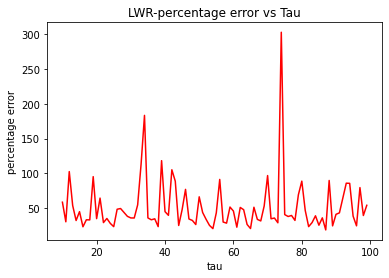

In [124]:

def cost_function_lwr(x, y, tau ): 
    w = get_coef_lwr(x_c.head(382),y_c.head(382), tau)
    cost = 0
    for i in range(382,545):
        y_hat = predict(w, x_c, i)
        cost += (abs(y_hat - y_c.iloc[i,0])/ y_c.iloc[i,0]) * 100
    return cost/(163)




def plot_graph(x_c, y_c): 
    list = []
    for i in range(10,100):
        if (i!=28 and i!=92):
            list.append(i)
    y_low = 100 
    #print(list)
    y_normal = []
    for i in list:  
        #print(i)     
        y_temp =  cost_function_lwr(x, y, i)
        y_normal.append(y_temp)
        if (y_low > y_temp): 
            y_low = y_temp
            print('lowest min till now is = ' + str(y_temp) + 'at tau value = ' + str(i))
    print(y_normal)
    plt.xlabel('tau') 
    plt.ylabel('percentage error')  
    plt.title('LWR-percentage error vs Tau') 
    plt.plot( list ,y_normal, 'r')   
    plt.show()

plot_graph(x_c, y_c)
